# 911 Calls Exploratory Analysis

## Data and Set Up

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Read data
data=pd.read_csv("data.csv")


Basic info regarding data set.

lat=latitude
lng=longitude
des=description
zip=postal code type in pennsylvania.
twp=township
addr=address
e=dummy column all value in all cloumn are 1
 
This data set is regarding emergency calls in pennsylvania state which in US.

In [3]:
#Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# Check head
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [7]:
to_zip=data.zip.value_counts().nlargest()

In [8]:
to_zip

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships(twp) for 911 calls?**

In [10]:
data.twp.value_counts().nlargest()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there?**

In [13]:
print("Tere are total",data.title.nunique(),"title codes are present.")

Tere are total 110 title codes are present.


## Creating New Features

** In the title column there are 'Reasons/Departments' specified before the title code.  These are EMS, Fire, and Traffic.   
Use .apply() with a custom lambda expression to create a new column called 'Reason' that contains this string value.**

In [52]:
data["Reason"]=data["title"].apply( lambda x:x.split(":")[1])

In [53]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,VEHICLE ACCIDENT -
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,VEHICLE ACCIDENT -
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,FALL VICTIM
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,NAUSEA/VOMITING


** What is the most common reason for a 911 call based off this new column?**

In [54]:
rea=data.Reason.value_counts().nlargest()

In [55]:
print("The most common reason for 911 calls is",rea[:1])

The most common reason for 911 calls is  VEHICLE ACCIDENT -    23066
Name: Reason, dtype: int64


** Use seaborn to create a countplot of 911 calls by Reason**

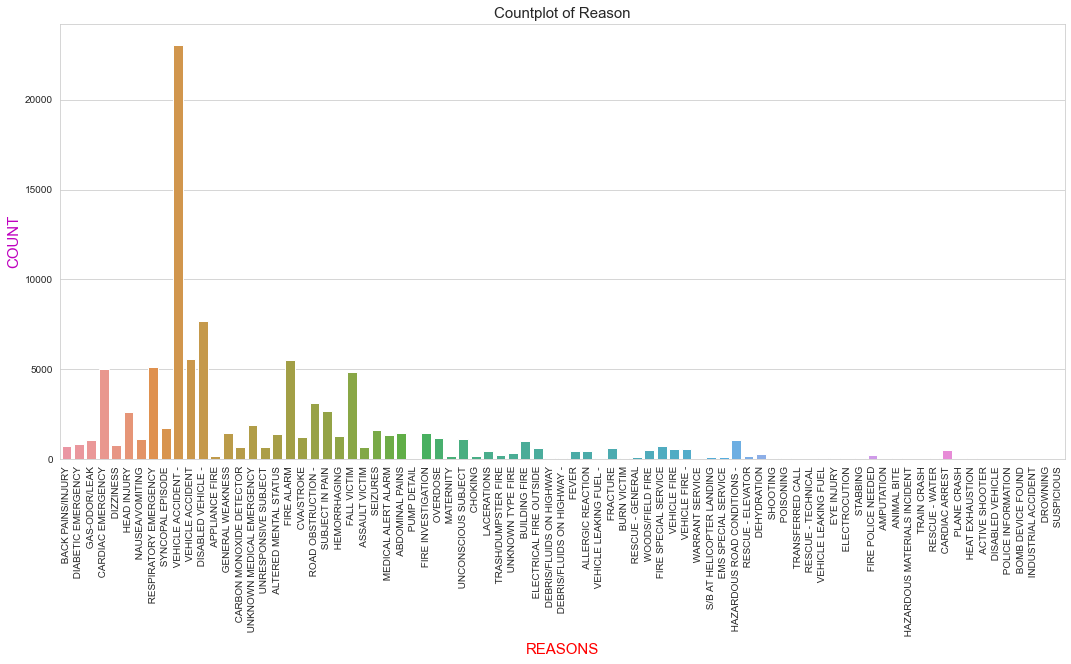

In [56]:
plt.figure(figsize=(18,8))
sns.countplot(x="Reason",data=data)
plt.xticks(rotation=90)
plt.xlabel("REASONS",fontsize=15,color="r")
plt.ylabel("COUNT",fontsize=15,color="m")
plt.title("Countplot of Reason",fontsize=15)
sns.set_palette("ocean")
sns.set_style("whitegrid")
plt.show()

** What is the data type of the objects in the timeStamp column?**

In [46]:
data.timeStamp.dtype

dtype('O')

** Convert timeStamp from strings to DateTime object**

In [67]:
data["timeStamp"]=pd.to_datetime(data["timeStamp"])

In [69]:
data["timeStamp"].dtype

dtype('<M8[ns]')

** Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.  
Create these columns based off of the timeStamp column.**

In [70]:
data["Hour"]=pd.DatetimeIndex(data["timeStamp"]).hour

In [71]:
# Create hour column
data["Hour"]=pd.DatetimeIndex(data["timeStamp"]).hour

In [72]:
# Create month column
data["Month"]=pd.DatetimeIndex(data["timeStamp"]).month

In [73]:
# Create day of week
data["Day"]=pd.DatetimeIndex(data["timeStamp"]).day_of_week

In [77]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,VEHICLE ACCIDENT -,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,VEHICLE ACCIDENT -,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,FALL VICTIM,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,NAUSEA/VOMITING,11,8,2


In [76]:
# Confirm columns were added to dataframe or not?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  Hour       99492 non-null  int64         
 11  Month      99492 non-null  int64         
 12  Day        99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


** Notice how the Day of Week is an integer 0-6. Use the .map() with a dictionary to map the actual string names to the day of the week** like this: {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [79]:
data["Day"]=data["Day"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [80]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,VEHICLE ACCIDENT -,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,VEHICLE ACCIDENT -,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,FALL VICTIM,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,NAUSEA/VOMITING,11,8,Wed


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column **

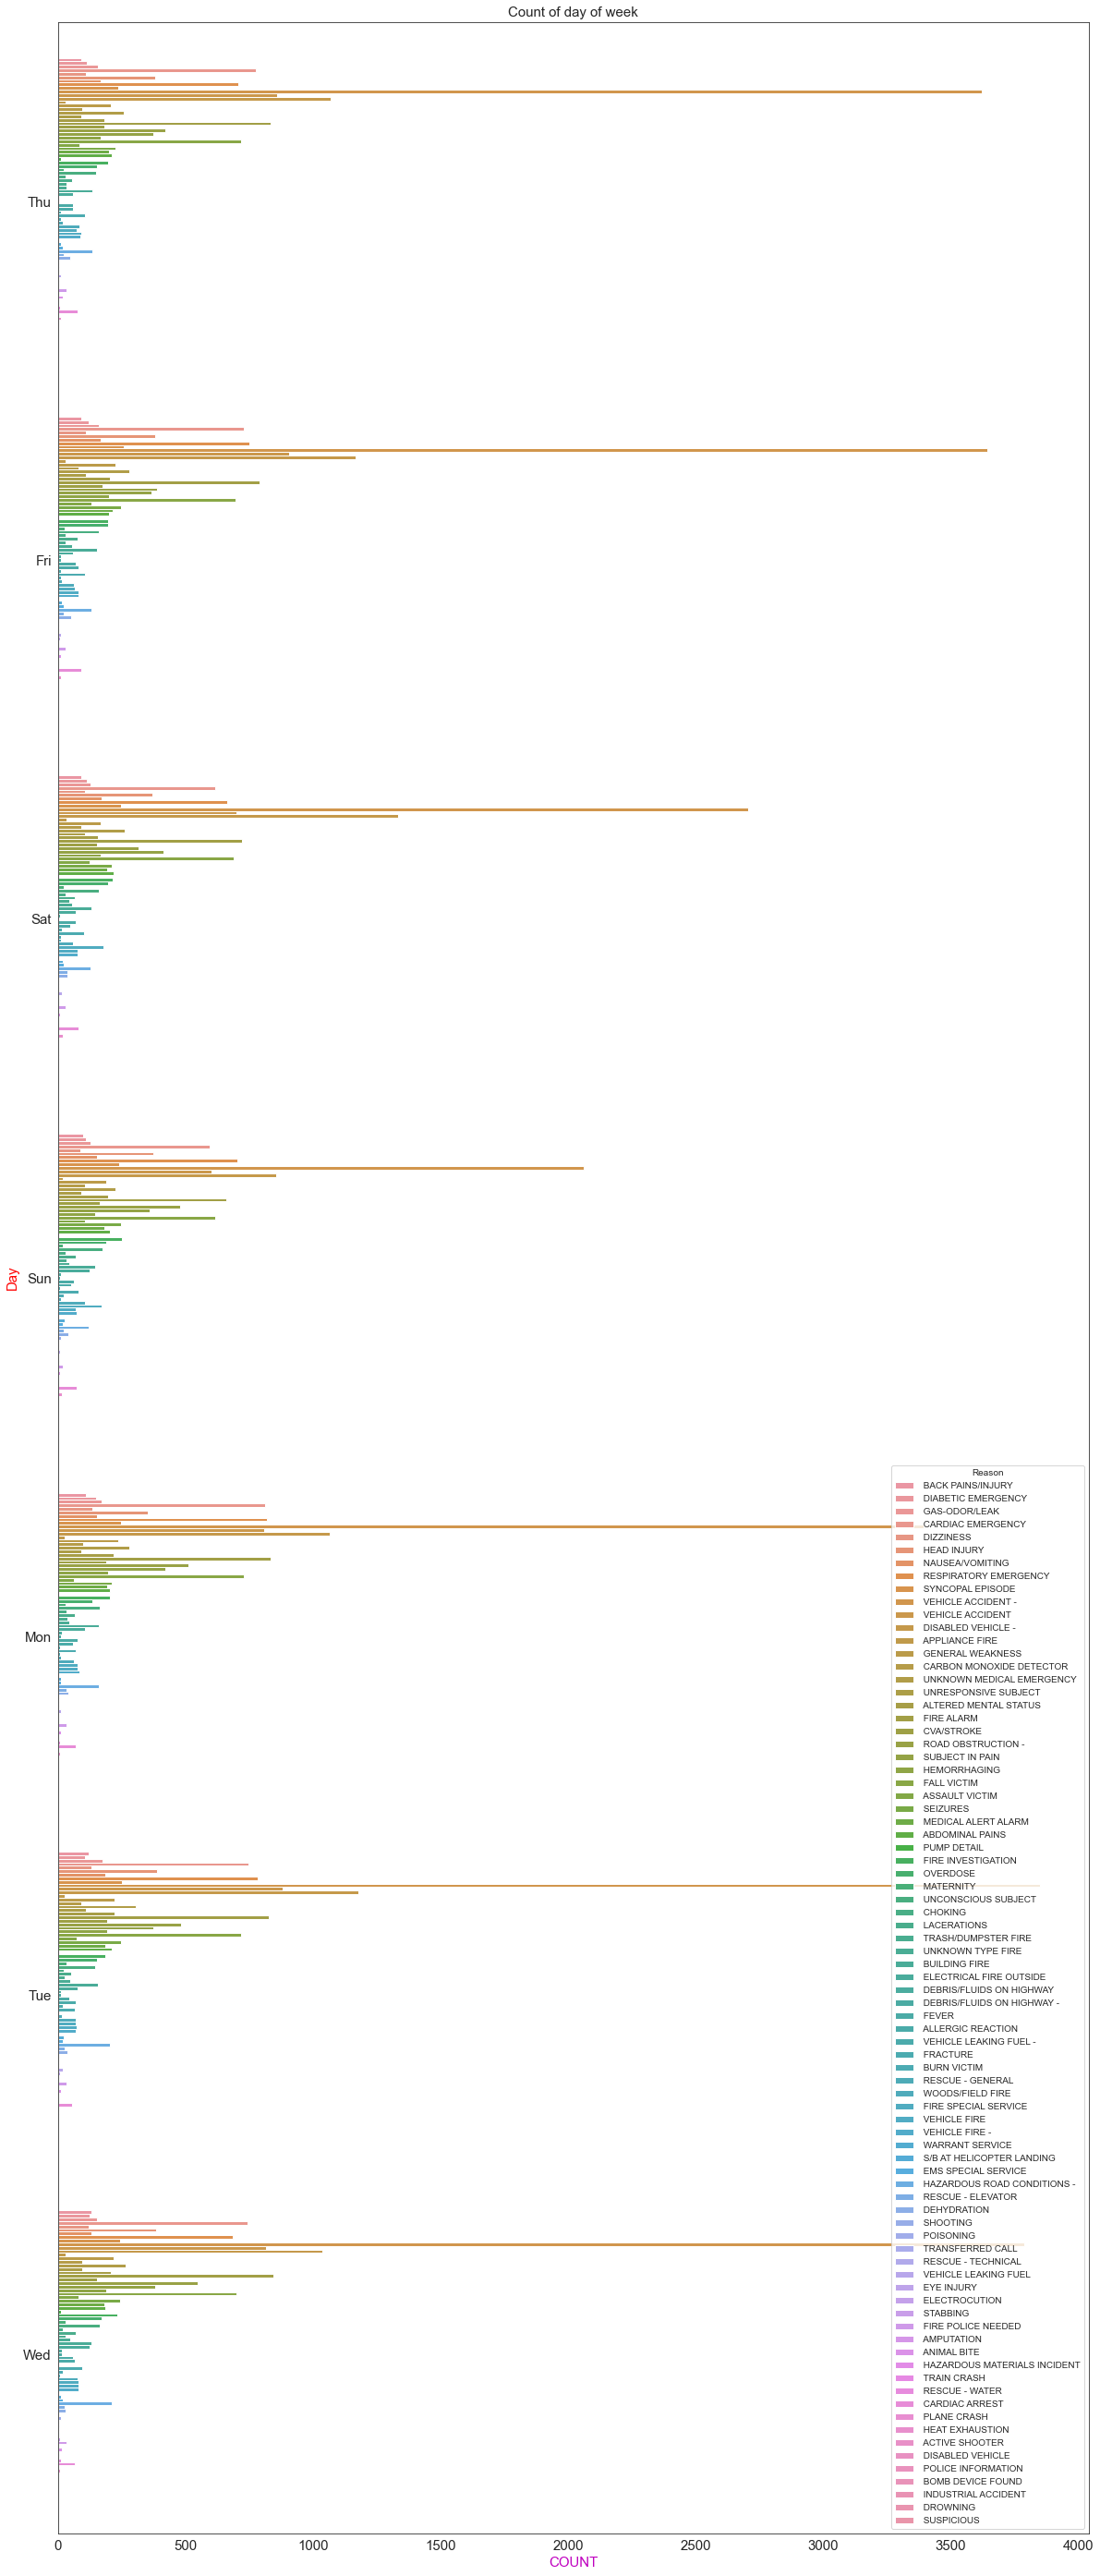

In [112]:
# Create count plot
plt.figure(figsize=(20,50))
sns.countplot(y="Day",data=data,hue="Reason")
plt.xlabel("COUNT",color="m",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Day",color="r",fontsize=15)
plt.yticks(fontsize=15)
plt.title("Count of day of week",fontsize=15)
plt.show()

**Use seaborn to create a countplot of the Month column with the hue based off the Reason column**

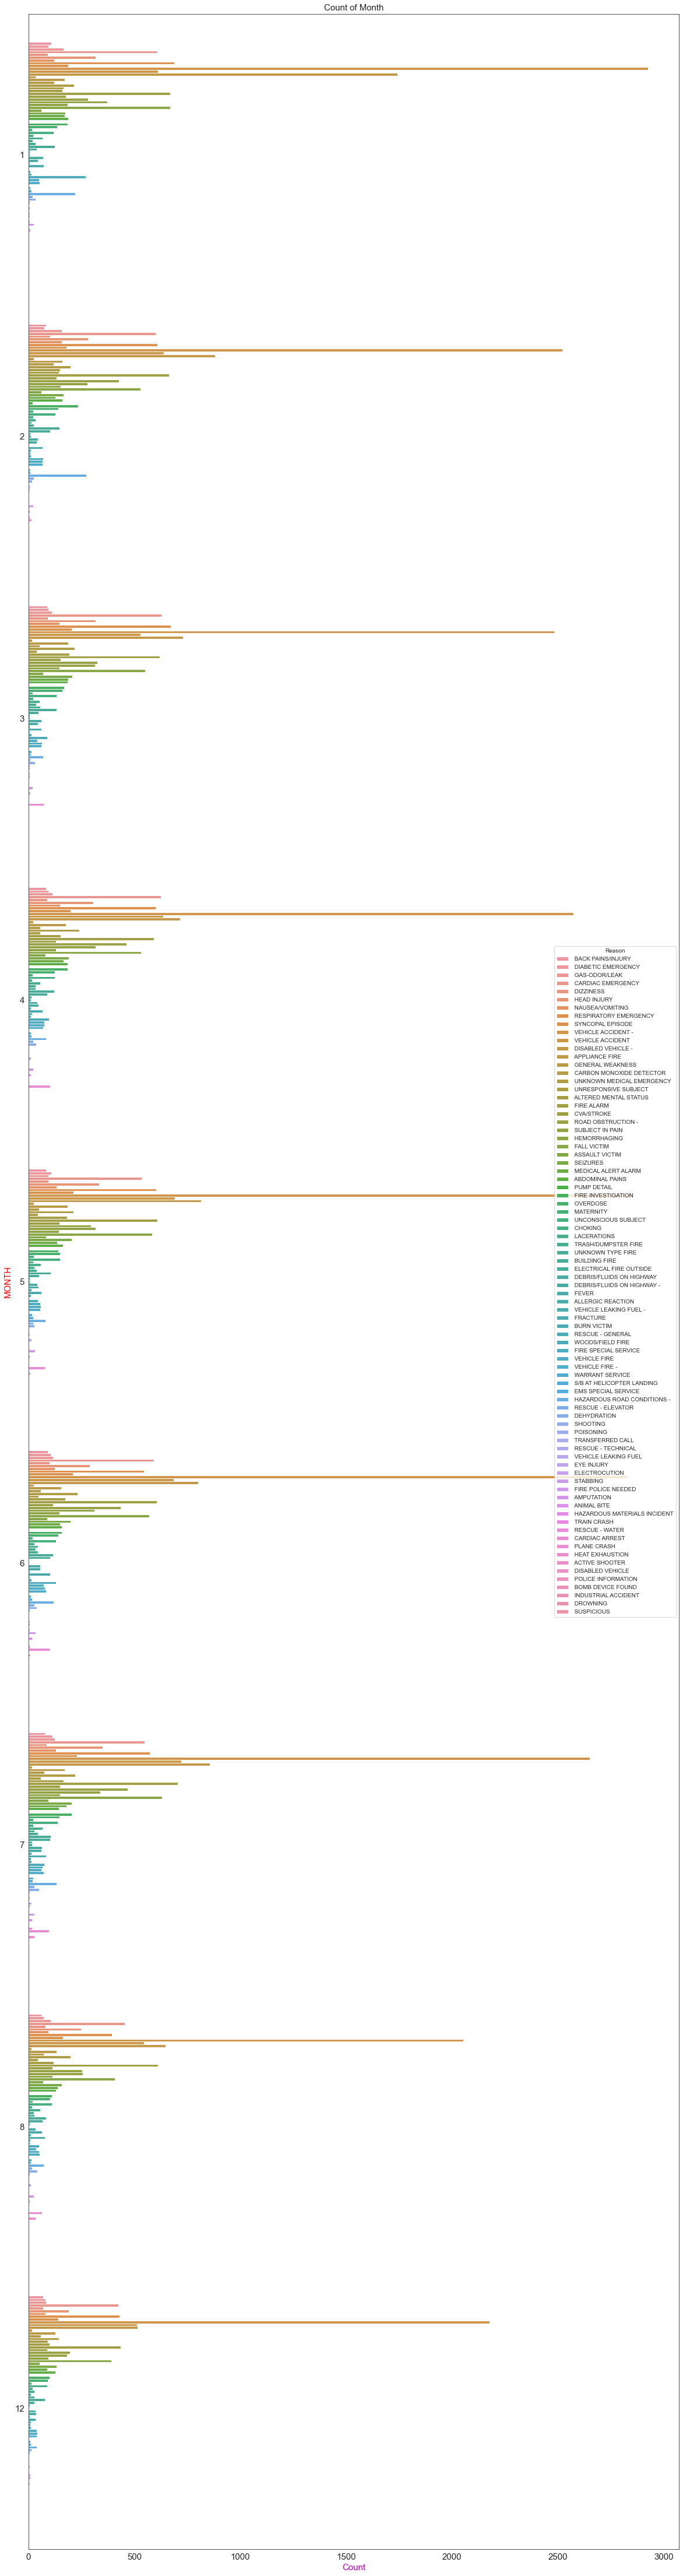

In [113]:
plt.figure(figsize=(20,80))
sns.countplot(y="Month",data=data,hue="Reason")
plt.xlabel("Count",color="m",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("MONTH",color="r",fontsize=15)
plt.yticks(fontsize=15)
plt.title("Count of Month",fontsize=15)
plt.show()

In [116]:
new=data["Month"].value_counts()

In [127]:
new

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

** Do you notice something strange about this Plot? **    
Plot is missing some months.  May need to plot this information another way, possibly a simple line plot, that fills in the missing data.

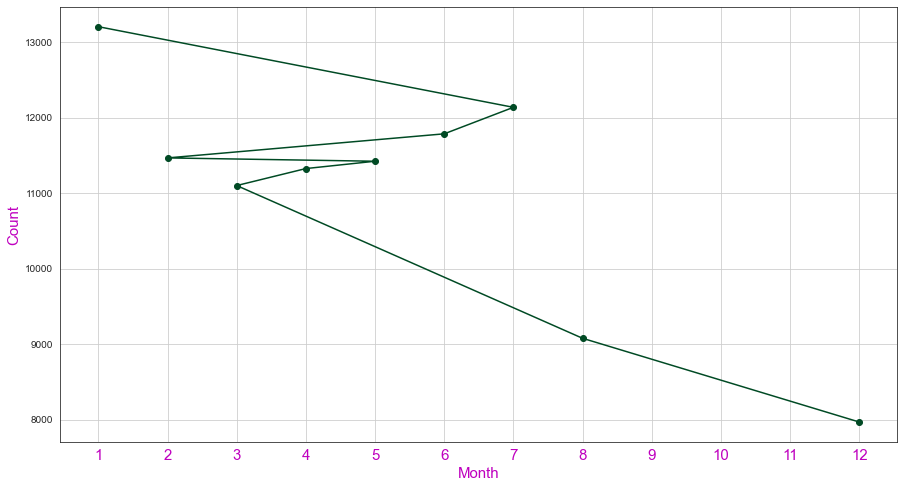

In [132]:
plt.figure(figsize=(15,8))
plt.plot(new.index,new.values,marker="o")
plt.grid()
plt.xlabel("Month",color="m",fontsize=15)
plt.xticks(ticks=range(1,13),fontsize=15,color="m")
plt.ylabel("Count",color="m",fontsize=15)
plt.show()

Conclision: From line plot we can find missing month values on the linplot basis.
            so the graph is decresing manner from month 8 to 12 ,so missing month values lies between  8 to 12 month.
            Missing month values are also in decresing manner lie betwwen 9000 to 8000.

** Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation. **

In [147]:
data.groupby("Month").describe().iloc[:,0]#.agg([np.mean,np.var,np.max])

Month
1     13205.0
2     11467.0
3     11101.0
4     11326.0
5     11423.0
6     11786.0
7     12137.0
8      9078.0
12     7969.0
Name: (lat, count), dtype: float64

**Create a simple plot off of the dataframe indicating the count of calls per month**

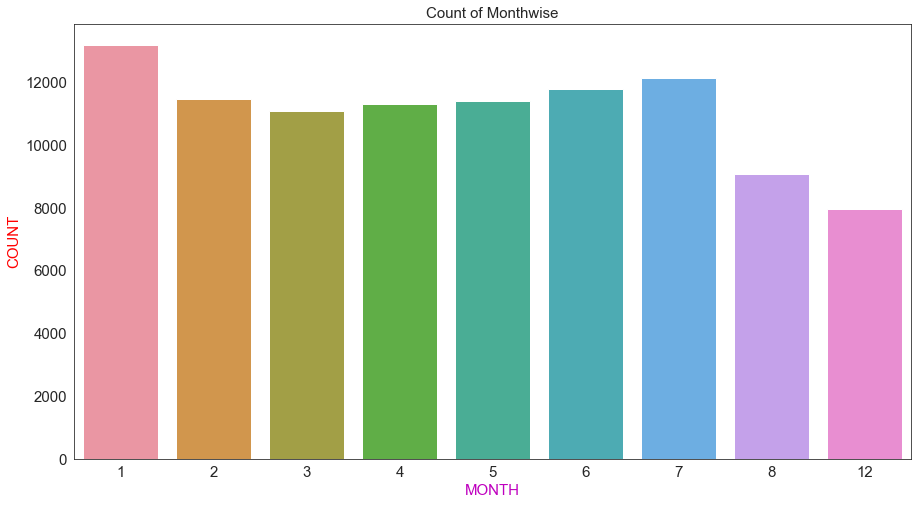

In [150]:
plt.figure(figsize=(15,8))
sns.countplot(x="Month",data=data)
plt.xlabel("MONTH",color="m",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("COUNT",color="r",fontsize=15)
plt.yticks(fontsize=15)
plt.title("Count of Monthwise",fontsize=15)
plt.show()